<a href="https://colab.research.google.com/github/smgoldfish/ML-Assignment-1/blob/main/Regression_TeamAlpha(07).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPROCESSING :

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ECONOMY DATASET :

In [ ]:
eco_df=pd.read_csv('/content/economy_final.csv')

In [ ]:
eco_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left
0,04-03-2022,GO FIRST,G8,505.0,17:40,Chennai,01h 15m,non-stop,18:55,Hyderabad,1105,Economy,24
1,15-03-2022,Indigo,6E,6137.0,09:00,Chennai,05h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,14:15,Hyderabad,1105,Economy,34
2,15-03-2022,Indigo,6E,804.0,16:40,Chennai,05h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:40,Hyderabad,1105,Economy,34
3,15-03-2022,Indigo,6E,7208.0,08:40,Chennai,04h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:30,Hyderabad,1105,Economy,34
4,15-03-2022,Indigo,6E,605.0,13:05,Chennai,04h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:50,Hyderabad,1105,Economy,34


In [ ]:
eco_df.shape

(206672, 13)

In [ ]:
eco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206672 entries, 0 to 206671
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        206672 non-null  object 
 1   airline     206655 non-null  object 
 2   ch_code     206642 non-null  object 
 3   num_code    206581 non-null  float64
 4   dep_time    206667 non-null  object 
 5   from        206651 non-null  object 
 6   time_taken  206660 non-null  object 
 7   stop        206642 non-null  object 
 8   arr_time    206672 non-null  object 
 9   to          206662 non-null  object 
 10  price       206672 non-null  int64  
 11  class       206672 non-null  object 
 12  days_left   206672 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 20.5+ MB


In [ ]:
eco_df.isnull().sum()

,0
date,0
airline,17
ch_code,30
num_code,91
dep_time,5
from,21
time_taken,12
stop,30
arr_time,0
to,10


In [ ]:
eco_df['stop'].value_counts()

,count
stop,
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t,162040
non-stop,27884
2+-stop,12205
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t,1063
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t,588
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t,432
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t,381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t,321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t,284


In [ ]:
# Using .str.split() and .str.strip() to clean the column directly
eco_df['stop'] = eco_df['stop'].str.split('\n').str[0].str.strip()
eco_df.head(4)

In [ ]:
eco_df['stop'].value_counts()

,count
stop,
1-stop,166553
non-stop,27884
2+-stop,12205


BUSINESS DATASET :

In [ ]:
bus_df=pd.read_csv('/content/business_final.csv')

In [ ]:
bus_df.head(3)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left
0,10-03-2022,Air India,AI,516.0,07:35,Bangalore,01h 15m,non-stop,08:50,Hyderabad,12000,Business,40
1,22-03-2022,Air India,AI,507.0,06:30,Bangalore,01h 20m,non-stop,07:50,Hyderabad,12000,Business,44
2,07-03-2022,Air India,AI,516.0,07:35,Bangalore,01h 15m,non-stop,08:50,Hyderabad,12000,Business,39


In [ ]:
bus_df['stop'].value_counts()

,count
stop,
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t,81482
non-stop,8102
2+-stop,1083
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t,810
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t,776
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t,257
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t,242
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t,152
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t,93


In [ ]:
# Using .str.split() and .str.strip() to clean the column directly
bus_df['stop'] = bus_df['stop'].str.split('\n').str[0].str.strip()
bus_df.head(4)

In [ ]:
bus_df['stop'].value_counts()

,count
stop,
1-stop,84295
non-stop,8102
2+-stop,1083


Merging the two datasets :

In [ ]:
df=pd.concat([eco_df,bus_df],ignore_index=True)

In [ ]:
df.head(3)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left
0,04-03-2022,GO FIRST,G8,505.0,17:40,Chennai,01h 15m,non-stop,18:55,Hyderabad,1105,Economy,24
1,15-03-2022,Indigo,6E,6137.0,09:00,Chennai,05h 15m,1-stop,14:15,Hyderabad,1105,Economy,34
2,15-03-2022,Indigo,6E,804.0,16:40,Chennai,05h 00m,1-stop,21:40,Hyderabad,1105,Economy,34


In [ ]:
df.shape

(300159, 13)

Our dataset has 13 columns and 300159 instances.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300159 entries, 0 to 300158
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        300159 non-null  object 
 1   airline     300142 non-null  object 
 2   ch_code     300057 non-null  object 
 3   num_code    300046 non-null  float64
 4   dep_time    300154 non-null  object 
 5   from        300130 non-null  object 
 6   time_taken  300147 non-null  object 
 7   stop        300122 non-null  object 
 8   arr_time    300159 non-null  object 
 9   to          300149 non-null  object 
 10  price       300159 non-null  int64  
 11  class       300159 non-null  object 
 12  days_left   300159 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 29.8+ MB


Dropping unnecessary columns :

In [ ]:
df=df.drop(columns=['ch_code','num_code'])

In [ ]:
df.isnull().sum()

,0
date,0
airline,17
dep_time,5
from,29
time_taken,12
stop,37
arr_time,0
to,10
price,0
class,0


Also as the null values in the coolumns are less than 30% , we decided to drop them.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Converting the 'dep_time' (departure time) and 'arr_time' (arrival time) columns into time-of-day categories such as 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', and 'Late Night' to enhance interpretability and improve the model's inference.

In [ ]:
df['dep_time'] = df['dep_time'].astype(str)
df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M').dt.time

df['arr_time'] = df['arr_time'].astype(str)
df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H:%M').dt.time

def categorize_time(time):
  if 0 <= time.hour < 3:
    return "Late Night"
  elif 3 <= time.hour < 7:
    return "Early Morning"
  elif 8 <= time.hour < 12:
    return "Morning"
  elif 12 <= time.hour < 16:
    return "Afternoon"
  elif 16 <= time.hour < 20:
    return "Evening"
  else:
    return "Night"

df['dep_time'] = df['dep_time'].apply(categorize_time)
df['arr_time'] = df['arr_time'].apply(categorize_time)
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left
0,04-03-2022,GO FIRST,Evening,Chennai,01h 15m,non-stop,Evening,Hyderabad,1105,Economy,24
1,15-03-2022,Indigo,Morning,Chennai,05h 15m,1-stop,Afternoon,Hyderabad,1105,Economy,34
2,15-03-2022,Indigo,Evening,Chennai,05h 00m,1-stop,Night,Hyderabad,1105,Economy,34
3,15-03-2022,Indigo,Morning,Chennai,04h 50m,1-stop,Afternoon,Hyderabad,1105,Economy,34
4,15-03-2022,Indigo,Afternoon,Chennai,04h 45m,1-stop,Evening,Hyderabad,1105,Economy,34


Converting the time taken column into less than 2 hours , 2-4 hours , 4-6 hours ,6-8 hours and more than 8 hours.

In [ ]:
def categorize_duration(items):
  try:
    if int(items[0:2]) < 2:
      return 'Less than 2 hours'
    if int(items[0:2]) <= 4:
      return '2-4 hours'
    if int(items[0:2]) < 6:
      return '4-6 hours'
    if int(items[0:2]) <= 8:
      return '6-8 hours'
    if int(items[0:2]) > 8:
      return 'More than 8 hours'
  except:
    return 'More than 8 hours'

df['time_taken'] = df['time_taken'].apply(categorize_duration)
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left
0,04-03-2022,GO FIRST,Evening,Chennai,Less than 2 hours,non-stop,Evening,Hyderabad,1105,Economy,24
1,15-03-2022,Indigo,Morning,Chennai,4-6 hours,1-stop,Afternoon,Hyderabad,1105,Economy,34
2,15-03-2022,Indigo,Evening,Chennai,4-6 hours,1-stop,Night,Hyderabad,1105,Economy,34
3,15-03-2022,Indigo,Morning,Chennai,2-4 hours,1-stop,Afternoon,Hyderabad,1105,Economy,34
4,15-03-2022,Indigo,Afternoon,Chennai,2-4 hours,1-stop,Evening,Hyderabad,1105,Economy,34


Fixing data

In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,123878
Air India,79503
Indigo,43067
GO FIRST,23173
AirAsia,16098
SpiceJet,8709
VISTARA,3958
air-india,806
air india,571


To ensure consistency and address discrepancies in the 'airline' column :

In [ ]:
df['airline'] = df['airline'].str.lower().str.replace('-', ' ')
df['airline'] = df['airline'].str.title()
df['airline'].replace({'Spicejet':'Spice Jet'}, inplace=True)

In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127836
Air India,80880
Indigo,43067
Go First,23173
Airasia,16098
Spice Jet,9009


To ensure consistency and address discrepancies in the 'From' & 'to' column :

In [ ]:
df['from'].value_counts()

,count
from,
Delhi,61315
Mumbai,60896
Bangalore,52035
Kolkata,46256
Hyderabad,39773
Chennai,38663
Hyd,1034
KOLKATA,91


In [ ]:
df['from'].replace({'Hyd':'Hyderabad','KOLKATA':'Kolkata'}, inplace=True)
df['from'].value_counts()

,count
from,
Delhi,61315
Mumbai,60896
Bangalore,52035
Kolkata,46347
Hyderabad,40807
Chennai,38663


In [ ]:
df['to'].value_counts()

,count
to,
Mumbai,59070
Delhi,56470
Bangalore,51068
Kolkata,49469
Hyderabad,42727
Chennai,40368
Del,891


In [ ]:
df['to'].replace({'Del':'Delhi'}, inplace=True)
df['to'].value_counts()

,count
to,
Mumbai,59070
Delhi,57361
Bangalore,51068
Kolkata,49469
Hyderabad,42727
Chennai,40368


In [ ]:
df.isnull().sum()

,0
date,0
airline,0
dep_time,0
from,0
time_taken,0
stop,0
arr_time,0
to,0
price,0
class,0


#DATA VISUALISATION :

In [ ]:
df.head(2)

,date,airline,dep_time,from,time_taken,stop,arr_time,to,class,days_left,price
0,04-03-2022,Go First,Evening,Chennai,Less than 2 hours,non-stop,Evening,Hyderabad,Economy,24,1105
1,15-03-2022,Indigo,Morning,Chennai,4-6 hours,1-stop,Afternoon,Hyderabad,Economy,34,1105


*Now that we have pre-processed the data in the desirable format, we proceed to visualize it using various graphs and charts.*

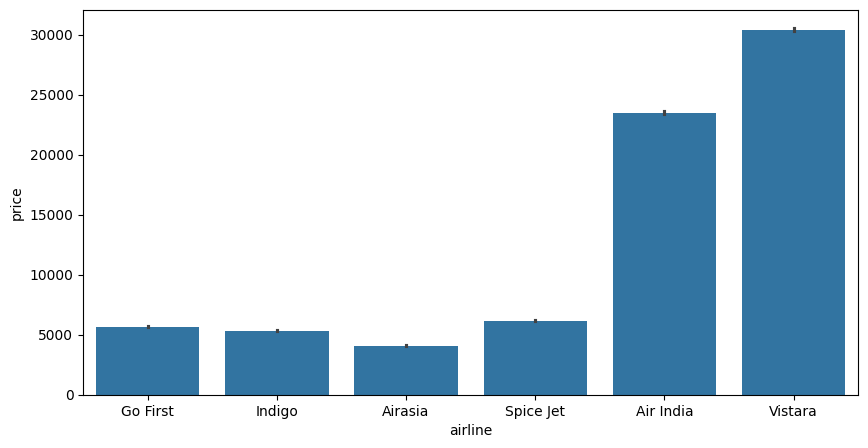

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['airline'],y=df['price'],data=df)
plt.show()

*The bar graph illustrates the variation in flight prices across different airlines, with **Vistara** having the **highest** fare and **AirAsia** offering the **lowest**.*

*However a crucial factor that must be taken into account when comparing average prices is cabin class.*

Text(0.5, 1.0, 'Average Business class price for airlines')

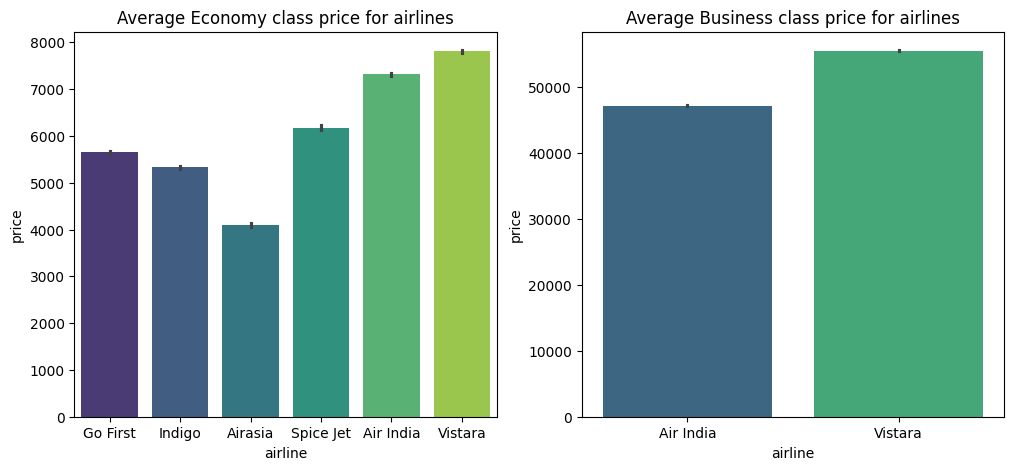

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
eco_df=df[df['class']=='Economy']
bus_df=df[df['class']=='Business']
sns.barplot(x='airline',y='price',data=eco_df,hue='airline',palette='viridis',legend=False,ax=ax[0])
ax[0].set_title('Average Economy class price for airlines')
sns.barplot(x='airline',y='price',hue='airline',data=bus_df,palette='viridis',legend=False,ax=ax[1])
ax[1].set_title('Average Business class price for airlines')

*The graphs depict a significant disparity in flight prices between economy and business class across different airlines.*

*In both classes, **Vistara** offers the **highest** fares, while **Indigo** and **AirAsia** have the **lowest** average prices in **economy class**.*

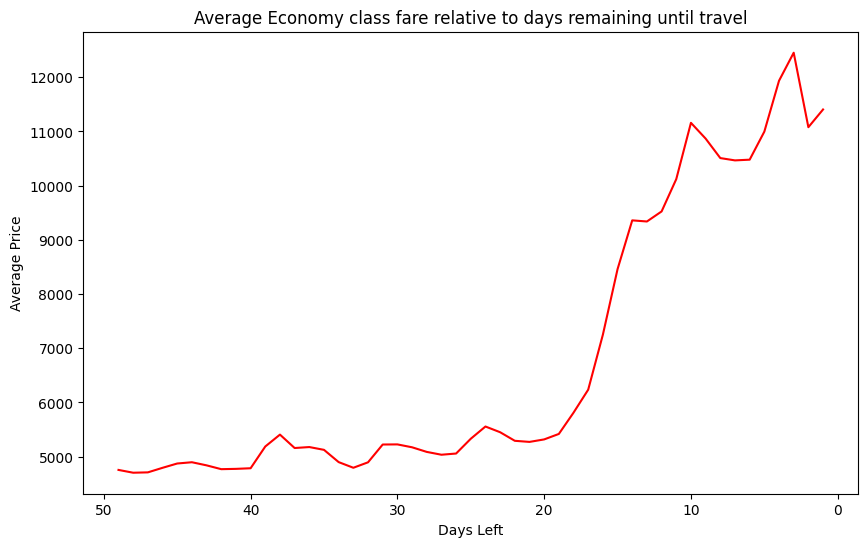

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=df[df['class']=='Economy'],errorbar=None,color='red')
plt.gca().invert_xaxis()
plt.title('Average Economy class fare relative to days remaining until travel')
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.show()

*The graph illustrates the trend of **increasing** average economy class fares as the departure date approaches. This phenomenon can be attributed to rising demand and limited availability.*

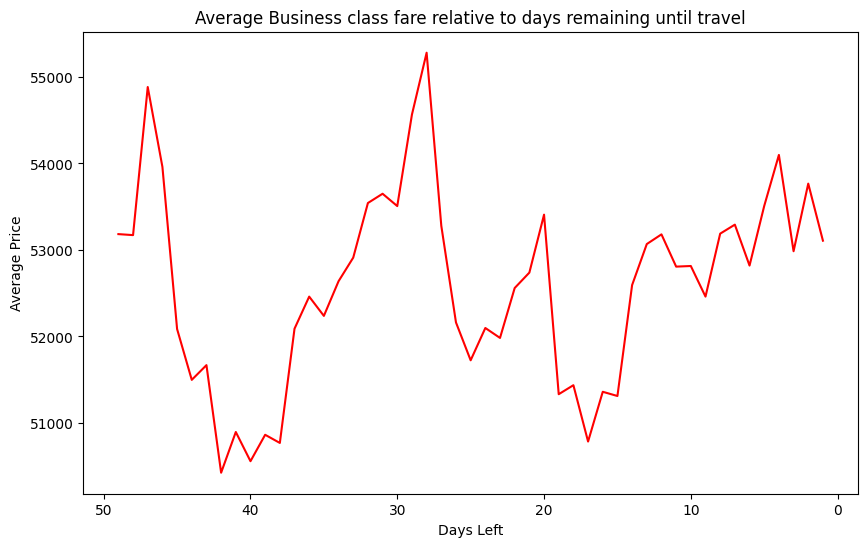

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=df[df['class']=='Business'],errorbar=None,color='red')
plt.gca().invert_xaxis()
plt.title('Average Business class fare relative to days remaining until travel')
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.show()

*The graph illustrating the average business class fare relative to days remaining until travel shows a more **volatile pattern** compared to the economy class graph.*

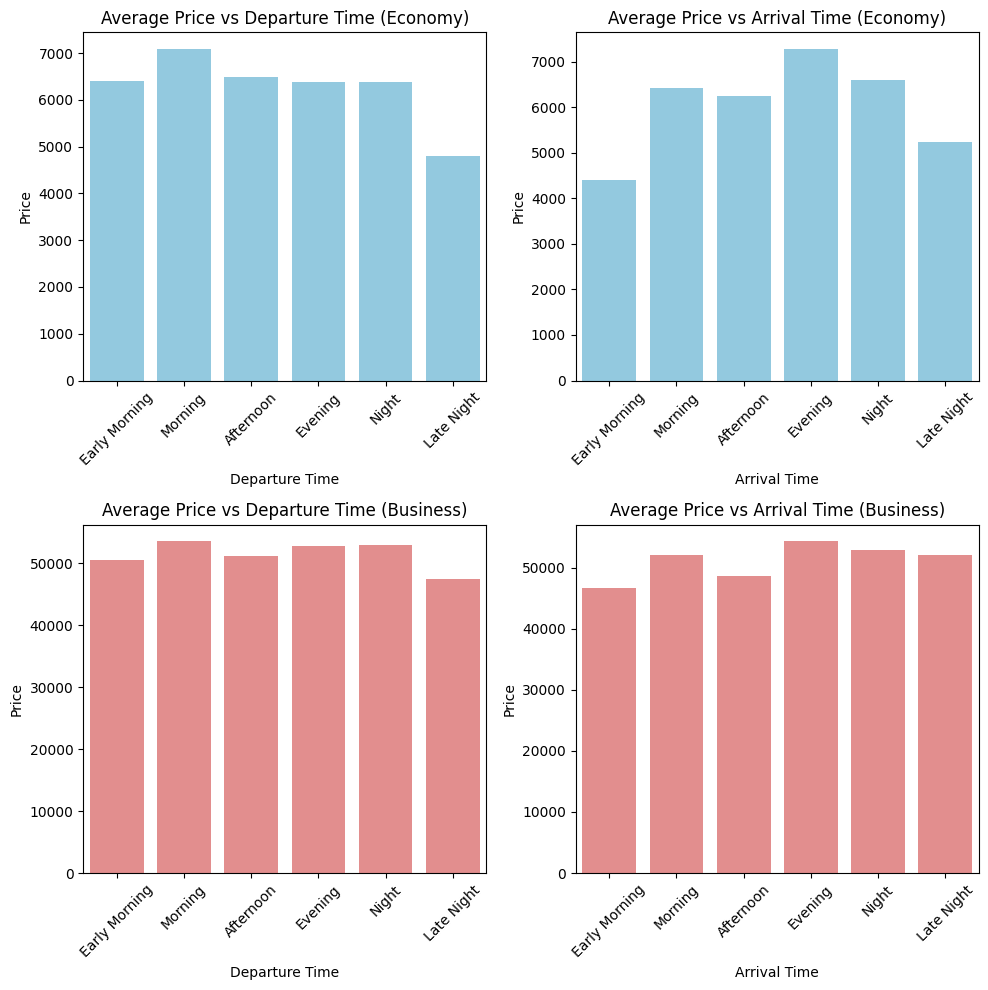

In [ ]:
eco_df = df[df['class'] == 'Economy']
eco_df_grouped_dep = eco_df.groupby('dep_time')['price'].mean().reset_index()
eco_df = df[df['class'] == 'Economy']
eco_df_grouped_arr = eco_df.groupby('arr_time')['price'].mean().reset_index()

bus_df = df[df['class'] == 'Business']
bus_df_grouped_dep = bus_df.groupby('dep_time')['price'].mean().reset_index()
bus_df = df[df['class'] == 'Business']
bus_df_grouped_arr = bus_df.groupby('arr_time')['price'].mean().reset_index()

order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(x='dep_time', y='price', data=eco_df_grouped_dep, order=order, ax=ax[0,0], color='skyblue')
ax[0,0].set_title('Average Price vs Departure Time (Economy)')
ax[0,0].set_xlabel('Departure Time')
ax[0,0].set_ylabel('Price')
ax[0,0].tick_params(axis='x', rotation=45)
sns.barplot(x='arr_time', y='price', data=eco_df_grouped_arr, order=order, ax=ax[0,1], color='skyblue')
ax[0,1].set_title('Average Price vs Arrival Time (Economy)')
ax[0,1].set_xlabel('Arrival Time')
ax[0,1].set_ylabel('Price')
ax[0,1].tick_params(axis='x', rotation=45)

sns.barplot(x='dep_time', y='price', data=bus_df_grouped_dep, order=order, ax=ax[1,0], color='lightcoral')
ax[1,0].set_title('Average Price vs Departure Time (Business)')
ax[1,0].set_xlabel('Departure Time')
ax[1,0].set_ylabel('Price')
ax[1,0].tick_params(axis='x', rotation=45)
sns.barplot(x='arr_time', y='price', data=bus_df_grouped_arr, order=order, ax=ax[1,1], color='lightcoral')
ax[1,1].set_title('Average Price vs Arrival Time (Business)')
ax[1,1].set_xlabel('Arrival Time')
ax[1,1].set_ylabel('Price')
ax[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Economy**

*Flights departing **early morning** tend to be cheaper than those leaving later in the day whereas flights arriving **late night** often have lower prices compared to those arriving earlier.*

**Business**

*Business class flights departing in the **early morning** tend to have slightly lower prices compared to other departure times and those arriving in the **early morning** show a slight decrease in average prices compared to later arrival times.*

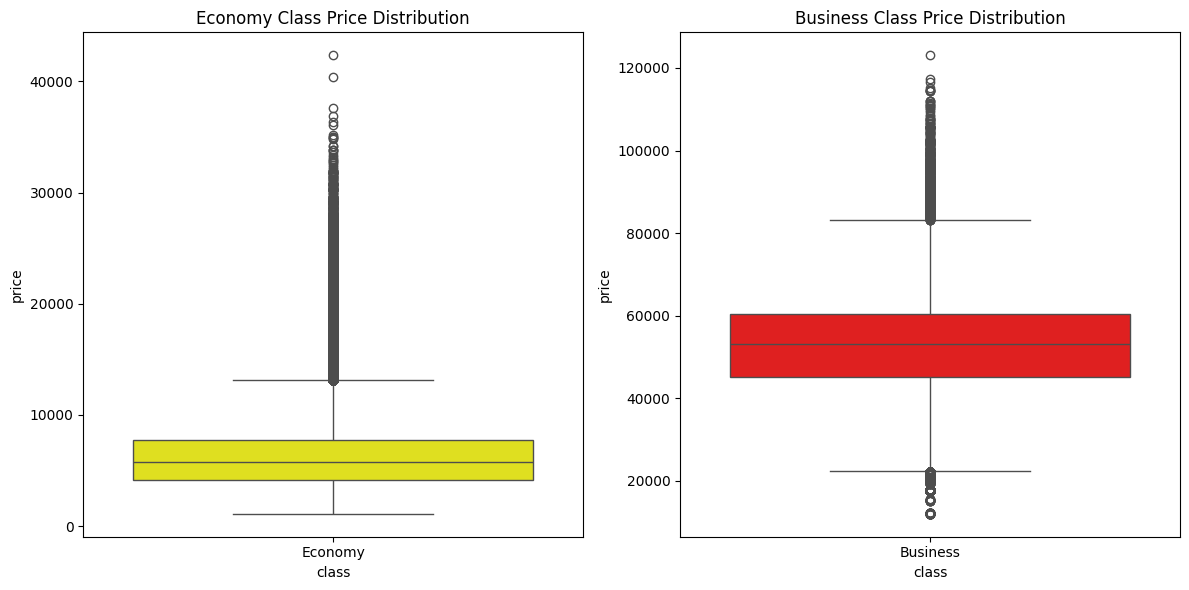

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='class', y='price', data=df[df['class'] == 'Economy'], color='yellow', ax=ax[0])
ax[0].set_title('Economy Class Price Distribution')
sns.boxplot(x='class', y='price', data=df[df['class'] == 'Business'], color='red', ax=ax[1])
ax[1].set_title('Business Class Price Distribution')
plt.tight_layout()
plt.show()

**Economy class:**

*The distribution is **skewed** to the **right**, with a **longer tail** on the **higher-priced side**. This suggests that there are some economy class tickets with prices considerably higher than the median.
There are some **outliers** on the **higher-priced side**, represented by the individual dots. These could be due to factors like last-minute bookings, peak travel times, or specific routes with higher demand.*

**Business class:**

*The distribution is **more compact**, with a **shorter tail** on the **higher-priced side**. This indicates that there is less variation in prices among business class tickets compared to economy class.*
*There are a **few outliers** on both the lower and higher-priced sides.*

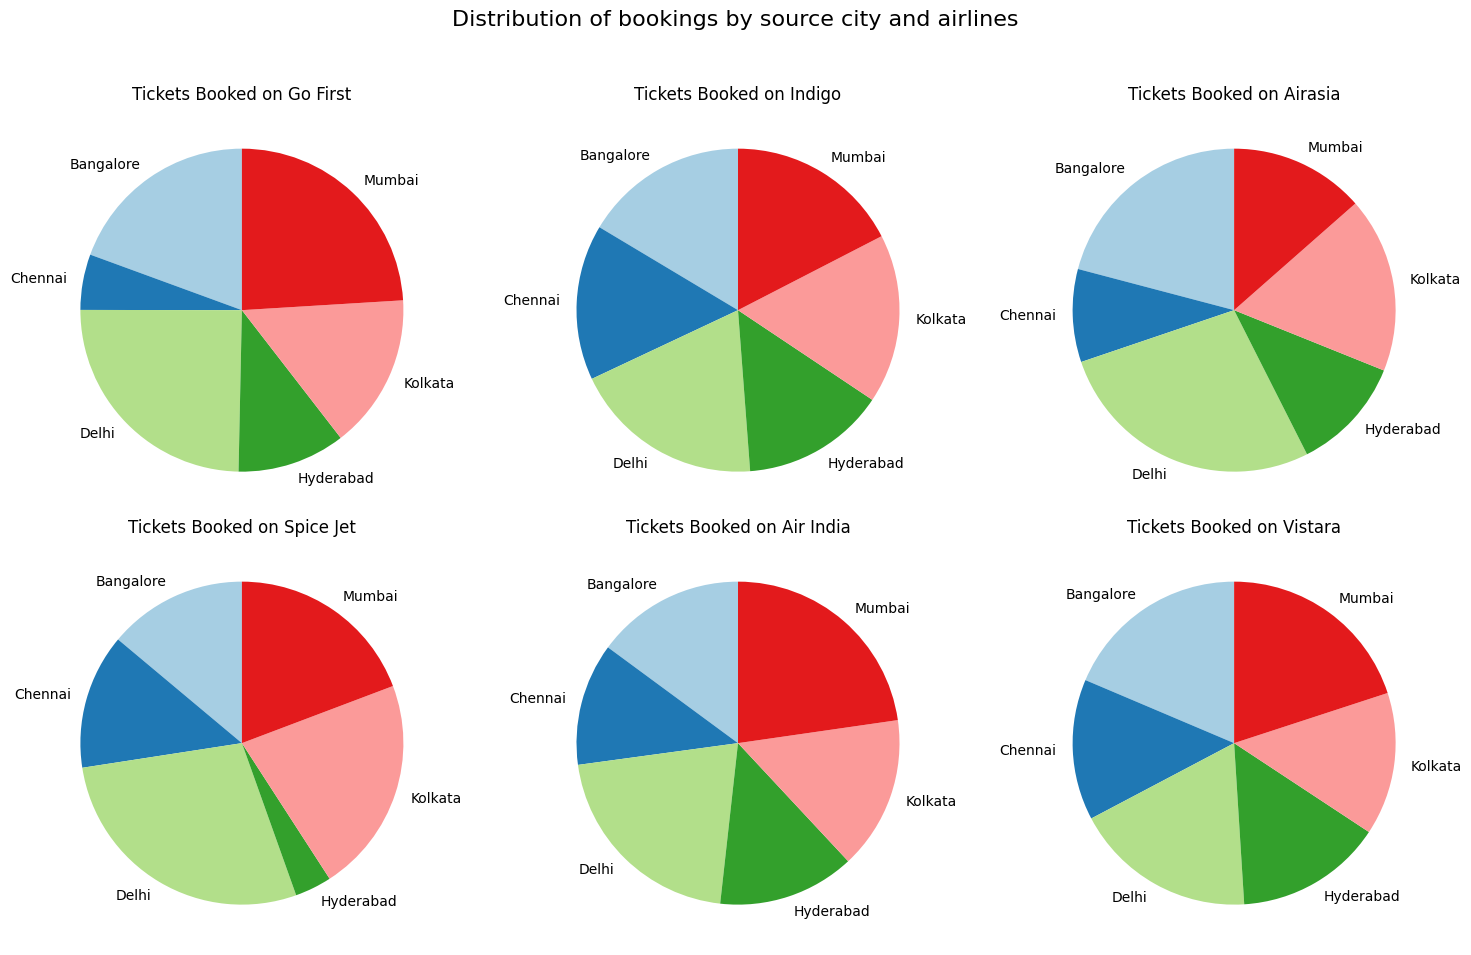

In [ ]:
city_airline_proportions = df.groupby(['from', 'airline'])['airline'].count().unstack()
airlines = df['airline'].unique()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of bookings by source city and airlines', fontsize=16)
for i, airline in enumerate(airlines):
  row = i // 3
  col = i % 3
  ax = axes[row, col]
  airline_data = city_airline_proportions[airline]
  ax.pie(airline_data, labels=airline_data.index, startangle=90,colors=plt.cm.Paired.colors)
  ax.set_title(f'Tickets Booked on {airline}', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

*The pie charts consistently show that the four major metropolitan cities in India—**Mumbai, Bangalore, Delhi,** and **Kolkata**—dominate ticket bookings for all six airlines.*

*Moreover, **Mumbai** tends to have the largest market share across most airlines, suggesting it might be a popular departure or arrival point for domestic flights. **Bangalore** and **Delhi** often occupy the second and third positions, indicating significant demand from these cities.*

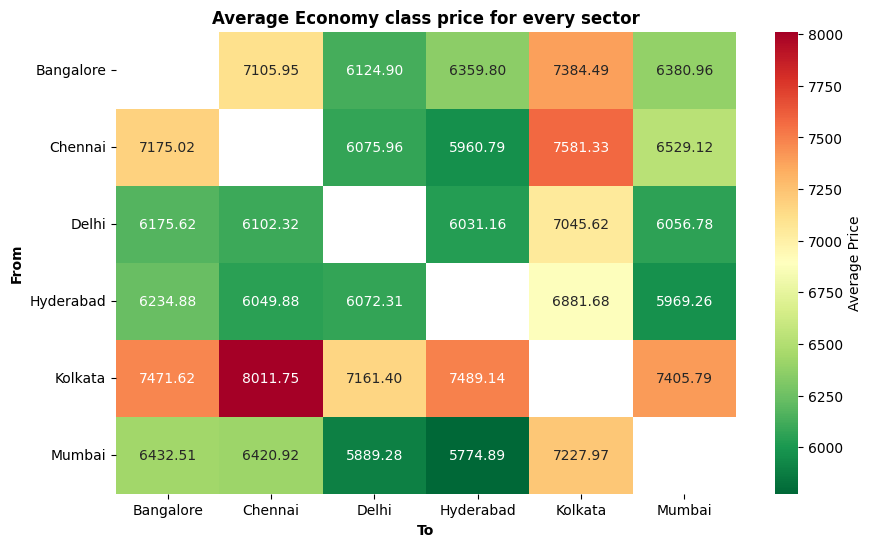

In [ ]:
heatmap_data = df[df['class'] == 'Economy'].groupby(['from', 'to'])['price'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn_r",cbar_kws={'label': 'Average Price'})
plt.xlabel('To', fontweight='bold')
plt.ylabel('From', fontweight='bold')
plt.yticks(rotation=0)
plt.title('Average Economy class price for every sector', fontweight='bold')
plt.show()

*Routes involving **Kolkata** often have higher prices, particularly when traveling to **Bangalore** or **Mumbai**. Routes involving **Delhi** tend to have some of the most affordable economy class fares, especially when traveling to **Chennai**, **Hyderabad**, or **Kolkata**.*


*The heatmap also reveals **regional trends**. For instance, flights within the southern region (Bangalore, Chennai, Hyderabad) tend to have lower prices compared to routes involving northern cities like Delhi and Kolkata.*

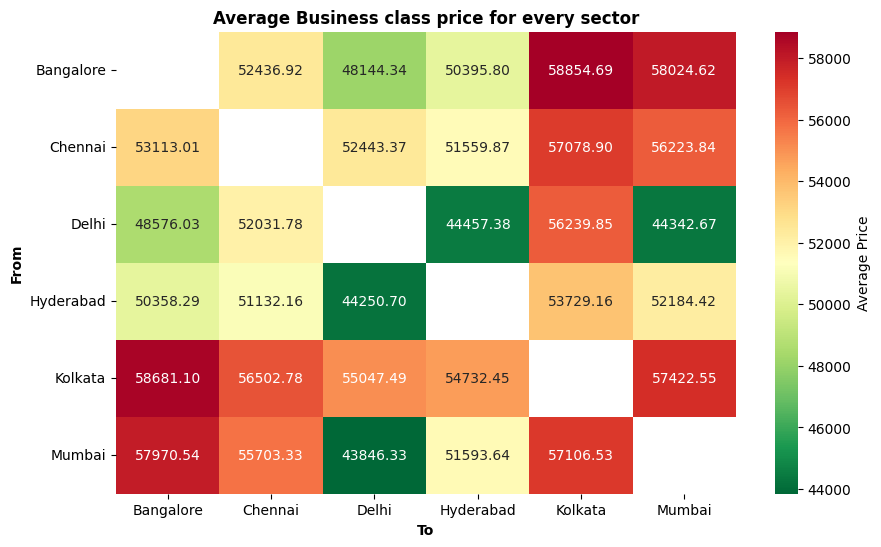

In [ ]:
heatmap_data = df[df['class'] == 'Business'].groupby(['from', 'to'])['price'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn_r",cbar_kws={'label': 'Average Price'})
plt.xlabel('To', fontweight='bold')
plt.ylabel('From', fontweight='bold')
plt.yticks(rotation=0)
plt.title('Average Business class price for every sector', fontweight='bold')
plt.show()

*The route from **Bangalore** to **Kolkata** appears to be the most expensive, suggesting it might be a popular route with high demand or limited competition.Routes between **Hyderabad** and **Delhi** in both directions, as well as between **Mumbai** and **Delhi**, offer relatively affordable business class travel.*

*The **regional trend** followed by the average economy class prices can also be observed here.*

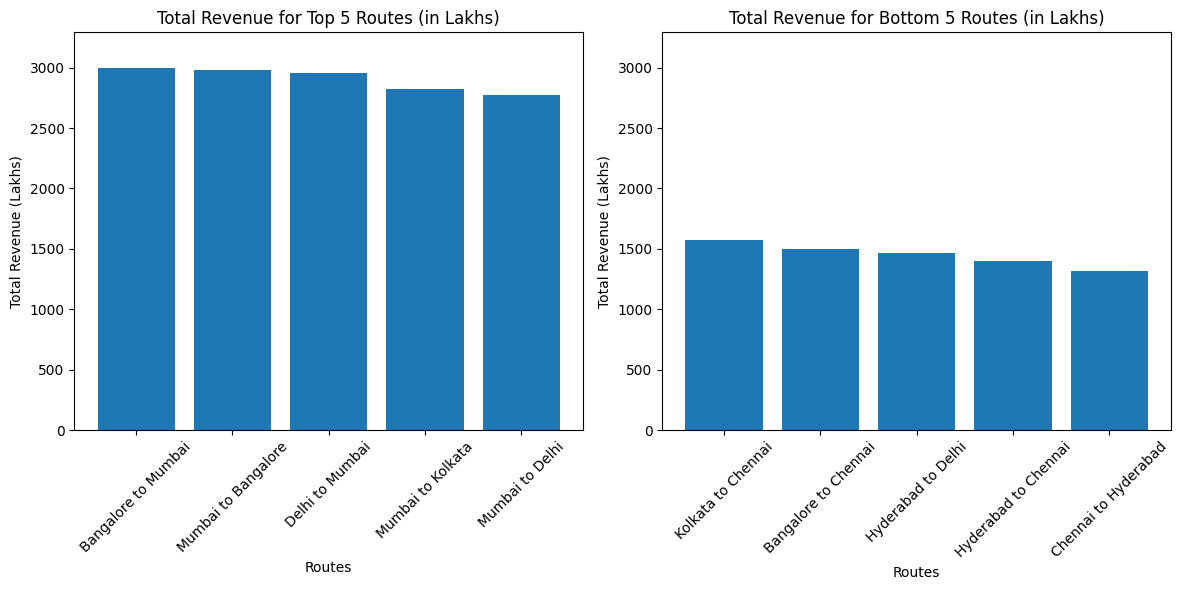

In [ ]:
route_revenue = df.groupby(['from', 'to'])['price'].sum().sort_values(ascending=False)
top_5_routes = route_revenue.head(5)
bottom_5_routes = route_revenue.tail(5)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(top_5_routes.index.map(lambda x: f"{x[0]} to {x[1]}"), top_5_routes.values / 100000)
ax[0].set_title('Total Revenue for Top 5 Routes (in Lakhs)')
ax[0].set_xlabel('Routes')
ax[0].set_ylabel('Total Revenue (Lakhs)')
ax[0].tick_params(axis='x', rotation=45)
ax[1].bar(bottom_5_routes.index.map(lambda x: f"{x[0]} to {x[1]}"), bottom_5_routes.values / 100000)
ax[1].set_title('Total Revenue for Bottom 5 Routes (in Lakhs)')
ax[1].set_xlabel('Routes')
ax[1].set_ylabel('Total Revenue (Lakhs)')
ax[1].tick_params(axis='x', rotation=45)

y_max = max(max(top_5_routes.values) / 100000, max(bottom_5_routes.values) / 100000)
ax[0].set_ylim(0, y_max * 1.1)
ax[1].set_ylim(0, y_max * 1.1)

plt.tight_layout()
plt.show()

**Top 5 Routes:**
* **Bangalore** to **Mumbai** is the most profitable route, generating the highest total revenue.
* The routes **Mumbai** to **Bangalore**, **Delhi** to **Mumbai**, **Mumbai** to **Kolkata**, and **Mumbai** to **Delhi** also rank among the top 5 revenue-generating routes.

**Bottom 5 Routes:**

* **Kolkata** to **Chennai** is the least profitable route among the bottom 5.
* Other routes with lower revenue include **Bangalore** to **Chennai**, **Hyderabad** to **Delhi**, **Hyderabad** to **Chennai**, and **Chennai** to **Hyderabad**.

<Axes: xlabel='stop', ylabel='price'>

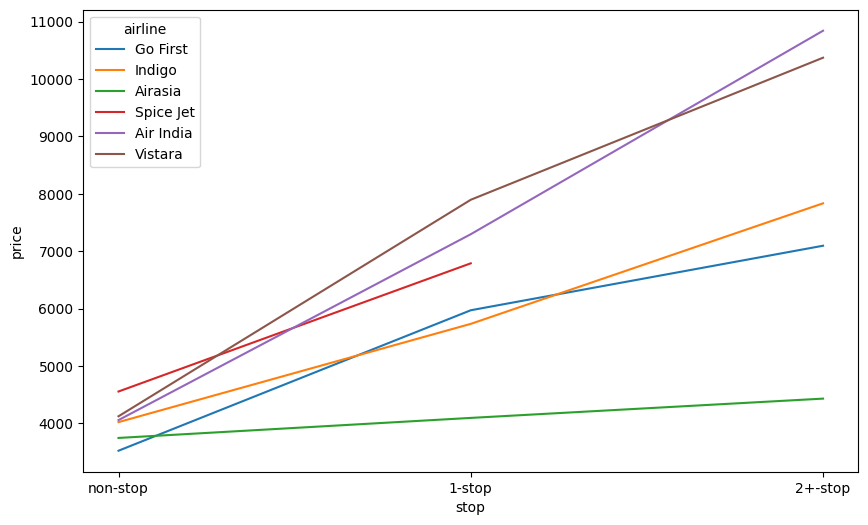

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df[df['class']=='Economy'],x='stop',y='price',hue='airline',errorbar=None)

*Based on the line plot, it can be inferred that **all airlines** exhibit a **general trend of increasing flight prices** as the **number of stops increases**. This suggests that passengers may expect to pay more for flights with layovers or connections compared to non-stop flights.*

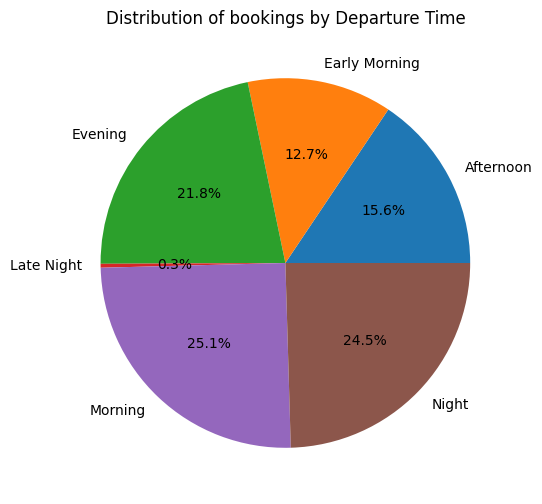

In [ ]:
df_counts = df.groupby('dep_time')['from'].count()

plt.figure(figsize=(8, 6))
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%')
plt.title('Distribution of bookings by Departure Time')
plt.show()

*The highest number of flights depart in the **morning**, accounting for **25.1%** of all departures. **Evening** and **early morning** flights also have a considerable presence, with **21.8%** and **20.0%** respectively. **Afternoon** and **night** flights have moderate activity levels at **15.6%** and **16.5%**. Late night flights are the least frequent, representing only **0.3%** of departures.*

#Modelling :

Label Encoding :
Converting categorical variables into numerical format, allowing machine learning algorithms to process and interpret the data effectively.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300063 entries, 0 to 300158
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300063 non-null  object
 1   airline     300063 non-null  object
 2   dep_time    300063 non-null  object
 3   from        300063 non-null  object
 4   time_taken  300063 non-null  object
 5   stop        300063 non-null  object
 6   arr_time    300063 non-null  object
 7   to          300063 non-null  object
 8   price       300063 non-null  int64 
 9   class       300063 non-null  object
 10  days_left   300063 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 27.5+ MB


In [ ]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

#saving each label encoder for future use
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)


Defining our feature set and label :

In [ ]:
X = df.drop(columns=['price'])
y = df['price']

Variance Inflation Factor (VIF) is used to identify and address multicollinearity in our dataset. By evaluating VIF scores, we determined which columns were highly correlated with others and might be redundant. This helped in deciding which columns to keep for a more accurate and efficient model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Features'] = X.columns
    return vif


In [ ]:
calculate_vif(X)

,VIF,Features
0,4.047550,date
1,2.663308,airline
2,3.350003,dep_time
3,2.904654,from
4,6.265030,time_taken
5,1.528054,stop
6,4.296201,arr_time
7,2.878592,to
8,2.894232,class
9,4.608199,days_left


As the VIF for time taken is more than 5 , we decided to drop it

In [ ]:
 X=X.drop(columns=['time_taken'])

In [ ]:
vif_updated=calculate_vif(X)
vif_updated

,VIF,Features
0,3.990836,date
1,2.628183,airline
2,3.024210,dep_time
3,2.809752,from
4,1.190874,stop
5,3.782686,arr_time
6,2.770743,to
7,2.873992,class
8,4.509555,days_left


The data is split into training, validation, and test sets, followed by model training using the optimal hyperparameters identified through Randomized Search :

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Splitting the data into train (80%), validation (10%), and test (10%) sets:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 10% validation, 10% test

# Parameter grids for each model
param_grids = {
    'Linear Regression': {},
    'KNN Regressor': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    }
}

# Models :
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor()
}


best_models = {}  #Storing the models with best hyperparameters

# Looping over models and performing RandomizedSearchCV with the train and validation sets
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...\n")

    # Creating the pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])


    # RandomizedSearchCV using X_val for validation
    param_grid = param_grids[model_name]
    randomized_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        n_iter=10,
        scoring='r2',
        refit=True,  # We will refit on the validation set manually
        n_jobs=-1,
        random_state=42,
        verbose=2
    )

    # Performing random search on the training data
    randomized_search.fit(X_train, y_train)

    # Evaluating the best model on the validation set
    best_model = randomized_search.best_estimator_
    y_val_pred = best_model.predict(X_val)

    # Performance metrics on validation set
    r2_val = r2_score(y_val, y_val_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    print(f"\nPerformance on Validation Data for {model_name}:")
    print(f"R2 Score (Val): {r2_val:.4f}")
    print(f"MSE (Val): {mse_val:.4f}")
    print(f"MAE (Val): {mae_val:.4f}")
    print(f"MAPE (Val): {mape_val:.4f}")

    # Storing the best model found
    best_models[model_name] = best_model


Tuning hyperparameters for Linear Regression...

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Performance on Validation Data for Linear Regression:
R2 Score (Val): 0.9005
MSE (Val): 51450450.6543
MAE (Val): 4812.6334
MAPE (Val): 0.4616

Tuning hyperparameters for KNN Regressor...

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Performance on Validation Data for KNN Regressor:
R2 Score (Val): 0.9662
MSE (Val): 17466295.9275
MAE (Val): 2212.5688
MAPE (Val): 0.1420

Tuning hyperparameters for Random Forest...

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Performance on Validation Data for Random Forest:
R2 Score (Val): 0.9705
MSE (Val): 15272507.6973
MAE (Val): 1984.0334
MAPE (Val): 0.1143


In [ ]:
# Combining X_train and X_val for final training
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Retraining the best model from the randomized search on the combined train+validation data
for model_name, best_model in best_models.items():
    print(f"\nRetraining {model_name} on combined train+validation data...\n")
    best_model.fit(X_train_val, y_train_val)

    # Predicting on the test data
    y_test_pred = best_model.predict(X_test)

    # Evaluating performance on test data
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    print(f"\nPerformance on Test Data for {model_name}:")
    print(f"R2 Score (Test): {r2_test:.4f}")
    print(f"MSE (Test): {mse_test:.4f}")
    print(f"MAE (Test): {mae_test:.4f}")
    print(f"MAPE (Test): {mape_test:.4f}")


Retraining Linear Regression on combined train+validation data...


Performance on Test Data for Linear Regression:
R2 Score (Test): 0.9051
MSE (Test): 48760107.6565
MAE (Test): 4701.3316
MAPE (Test): 0.4621

Retraining KNN Regressor on combined train+validation data...


Performance on Test Data for KNN Regressor:
R2 Score (Test): 0.9681
MSE (Test): 16391059.6957
MAE (Test): 2128.0702
MAPE (Test): 0.1386

Retraining Random Forest on combined train+validation data...


Performance on Test Data for Random Forest:
R2 Score (Test): 0.9720
MSE (Test): 14380342.8503
MAE (Test): 1909.6159
MAPE (Test): 0.1136


In [ ]:
print(f"Best Model: {best_model}")

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_split=10,
                                       n_estimators=200))])


In [ ]:
best_r2_score = r2_test
best_model_overall = model_name

if r2_test > best_r2_score:
    best_r2_score = r2_test
    best_model_overall = model_name


print(f"Best overall model: {best_model_overall} with R2 score of {best_r2_score:.4f} on test data")

Best overall model: Random Forest with R2 score of 0.9720 on test data


**The Random Forest Regressor model demonstrates excellent performance with a Mean Absolute Percentage Error (MAPE) of 0.11, indicating accurate predictions on average. The Mean Squared Error (MSE) of approximately 14380342.8503 shows smaller prediction errors compared to previous models. The R-squared value of 0.9720 indicates that 97.2% of the variance in the target variable is explained by the model, reflecting a very strong fit. Additionally, the Mean Absolute Error (MAE) of 1909.6159 highlights small average deviations from actual values, underscoring the model's effectiveness.**

Comparing the Actual and Predicted Value :

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

comparison_df.head()


,Actual,Predicted
72970,4721,4703.828902
44138,3999,4034.865126
286093,64173,62483.070938
106077,5873,4596.781099
145936,7212,6631.559051


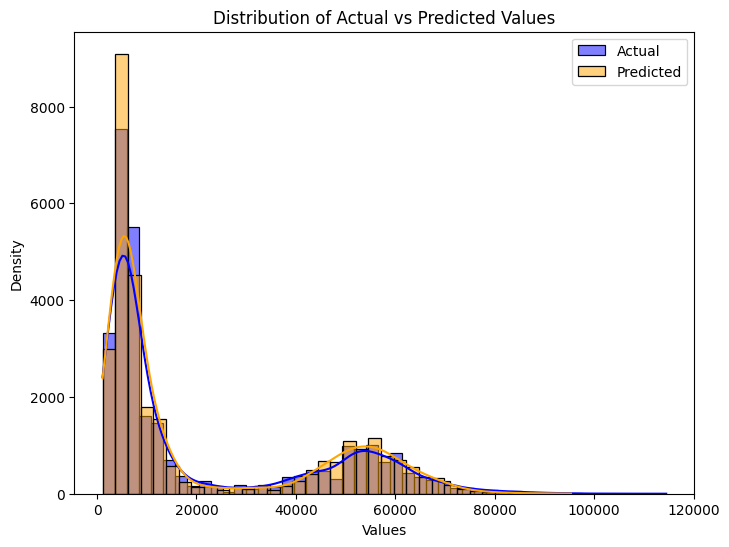

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True)
sns.histplot(y_test_pred, color='orange', label='Predicted', kde=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.show()


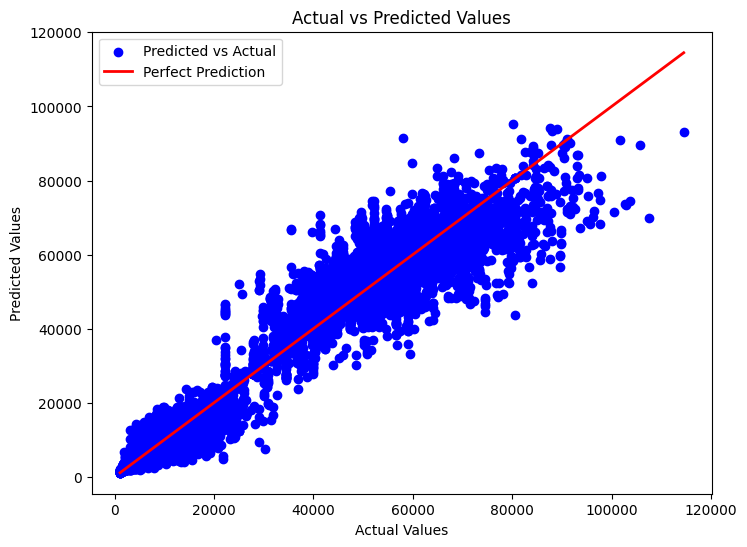

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Predicting the price by giving new values :

In [ ]:
from datetime import datetime

# Defining the columns that were label encoded
categorical_columns = ['airline', 'dep_time', 'from', 'stop', 'arr_time', 'to', 'class']

# Loading the label encoders
label_encoders = {}
for col in categorical_columns:
    with open(f'{col}_encoder.pkl', 'rb') as f:
        label_encoders[col] = pickle.load(f)

# New data
new_data = {
    'date': ['2024-09-10'],
    'airline': ['Indigo'],
    'dep_time': ['Evening'],
    'from': ['Chennai'],
    'stop': ['non-stop'],
    'arr_time': ['Afternoon'],
    'to': ['Banglore'],
    'class': ['Business'],
    'days_left': [30]
}

new_df = pd.DataFrame(new_data)

# Function to handle unseen categories
def transform_with_encoder(column, encoder):
    new_data_column = new_df[column].values
    if set(new_data_column).issubset(set(encoder.classes_)):
        return encoder.transform(new_data_column)
    else:
        transformed = np.full(new_data_column.shape, -1)  # Placeholder value for unseen categories
        for category in encoder.classes_:
            transformed[new_data_column == category] = encoder.transform([category])
        return transformed

# Applying label encoders to the new data
for col in categorical_columns:
    if col in new_df.columns:
        new_df[col] = transform_with_encoder(col, label_encoders[col])
    else:
        print(f"Column {col} is missing in new data.")

new_df['days_left'] = pd.to_numeric(new_df['days_left'], errors='coerce')

def convert_time_to_minutes(time_str):
    """Converts time in the format 'xh ym' to minutes."""
    if 'h' not in time_str:
        time_str = '0h '+time_str
    if 'm' not in time_str:
        time_str = time_str + ' 0m'
    hours, minutes = time_str.split()
    total_minutes = int(hours[:-1]) * 60 + int(minutes[:-1])
    return total_minutes


# Processng the 'date' column (example: convert it to ordinal or extract year, month, day)
new_df['date'] = pd.to_datetime(new_df['date']).apply(lambda x: x.toordinal())

# Predicting the price
predicted_price = best_model.predict(new_df)
print("The predicted price is ", predicted_price)

The predicted price is  [34774.40479168]
